In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [ ]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,39170,39186,39192,39227,39233,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425,41501,41633
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12921,13045,13153,13259,13391,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875,21202,21523
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,50579,50754,50914,51067,51213,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942,58272,58574
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1753,1836,1836,1836,1966,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756,4825,4888
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4475,4590,4672,4718,4797,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805,11035,11228


In [ ]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/24/20', '10/25/20', '10/26/20', '10/27/20', '10/28/20', '10/29/20',
       '10/30/20', '10/31/20', '11/1/20', '11/2/20'],
      dtype='object', length=290)

In [ ]:
# Extracting the date columns
#confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
confirmed = confirmed_cases.loc[:,confirmed_cases.columns.str.contains('^([89])/*')]
confirmed

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20
0,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074,39096,39145,39170,39186,39192,39227,39233,39254,39268
1,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535,12666,12787,12921,13045,13153,13259,13391,13518,13649
2,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023,50214,50400,50579,50754,50914,51067,51213,51368,51530
3,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681,1681,1753,1753,1836,1836,1836,1966,1966,2050
4,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117,4236,4363,4475,4590,4672,4718,4797,4905,4972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,12160,12297,12541,12770,13065,13398,13722,13928,14208,14510,14875,15184,15491,15834,16153,16534,16844,17306,17606,17989,18313,18476,18802,19213,19678,20155,20677,21251,21668,22204,22729,23281,23875,24471,25142,25575,26127,26779,27363,27919,28664,29256,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151,36580,37083,37591,37963,38253,38703,39121,39541,39899
264,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
265,1730,1734,1734,1760,1763,1768,1796,1797,1804,1832,1831,1841,1847,1858,1858,1869,1882,1889,1892,1899,1906,1907,1911,1916,1924,1930,1933,1943,1946,1953,1958,1962,1976,1979,1983,1983,1987,1989,1994,1999,2003,2007,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028,2028,2029,2029,2029,2030,2030,2031,2031,2034
266,6228,6347,6580,6793,7022,7164,7486,7903,8085,8210,8275,8501,8663,9021,9186,9343,9839,9981,10218,10372,10627,10831,11082,11148,11285,11376,11601,11779,11902,12025,12097,12381,12415,12523,12639,12709,12776,12836,12952,13112,13214,13323,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175,14389,14443,14491,14515,14612,14641,14660,14715,14759


In [ ]:
# Range of date
dates = confirmed.keys()
world_cases = []

# Fill with the dataset
for i in dates:
    confirmed_sum = confirmed[i].sum()
    world_cases.append(confirmed_sum)

world_cases

[17845776,
 18074223,
 18275762,
 18534444,
 18806739,
 19091627,
 19372712,
 19632158,
 19855786,
 20083126,
 20338229,
 20616309,
 20902522,
 21206982,
 21454848,
 21666905,
 21876956,
 22133335,
 22407934,
 22675270,
 22945130,
 23210627,
 23416254,
 23642667,
 23884657,
 24173659,
 24452913,
 24734591,
 24995589,
 25221986,
 25484522,
 25748825,
 26031618,
 26312542,
 26625387,
 26888722,
 27110865,
 27344672,
 27586081,
 27870469,
 28169763,
 28489680,
 28766957,
 29003154,
 29282910,
 29566785,
 29871718,
 30185505,
 30508985,
 30790156,
 31030975,
 31330357,
 31609634,
 31876722,
 32237760,
 32568144,
 32845630,
 33085887,
 33362982,
 33647039,
 33974074]

In [ ]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d

In [ ]:
# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_daily_increase

[17845776,
 228447,
 201539,
 258682,
 272295,
 284888,
 281085,
 259446,
 223628,
 227340,
 255103,
 278080,
 286213,
 304460,
 247866,
 212057,
 210051,
 256379,
 274599,
 267336,
 269860,
 265497,
 205627,
 226413,
 241990,
 289002,
 279254,
 281678,
 260998,
 226397,
 262536,
 264303,
 282793,
 280924,
 312845,
 263335,
 222143,
 233807,
 241409,
 284388,
 299294,
 319917,
 277277,
 236197,
 279756,
 283875,
 304933,
 313787,
 323480,
 281171,
 240819,
 299382,
 279277,
 267088,
 361038,
 330384,
 277486,
 240257,
 277095,
 284057,
 327035]

In [ ]:
# Prediciendo el futuro
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)

In [ ]:
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-20]

In [ ]:
#start = '1/22/2020'
start = '8/1/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [ ]:
# X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.25, shuffle=False)

In [ ]:
tscv = TimeSeriesSplit(n_splits=4)

In [ ]:
X_train_confirmed = X_test_confirmed= y_train_confirmed= y_test_confirmed =[]
for train_index, test_index in tscv.split(days_since_1_22):
  # Read below comments about following code
    X_train_confirmed, X_test_confirmed = days_since_1_22[train_index], days_since_1_22[test_index]
    y_train_confirmed, y_test_confirmed = world_cases[train_index], world_cases[test_index]

In [ ]:
# transform data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [ ]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 92636.7887969346
MSE: 13960131054.776434


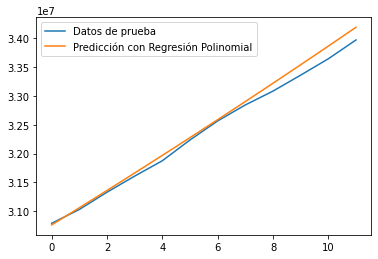

In [ ]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Datos de prueba', 'Predicción con Regresión Polinomial'])

In [ ]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 2248269.403884931
MSE: 8692697726953.531


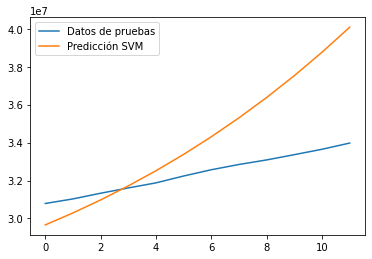

In [ ]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Datos de pruebas', 'Predicción SVM'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

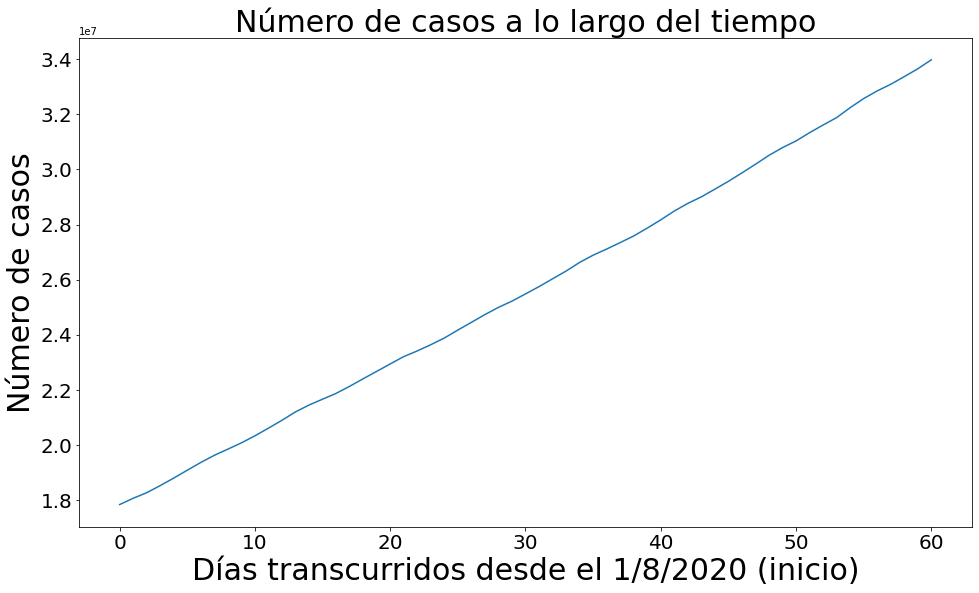

In [ ]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('Número de casos a lo largo del tiempo', size=30)
plt.xlabel('Días transcurridos desde el 1/8/2020 (inicio)', size=30)
plt.ylabel('Número de casos', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Numeros de casos en el tiempo', size=30)
    plt.xlabel('Fecha desde 8/1/2020', size=30)
    plt.ylabel('Numeros de casos', size=30)
    plt.legend(['Casos confirmados', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

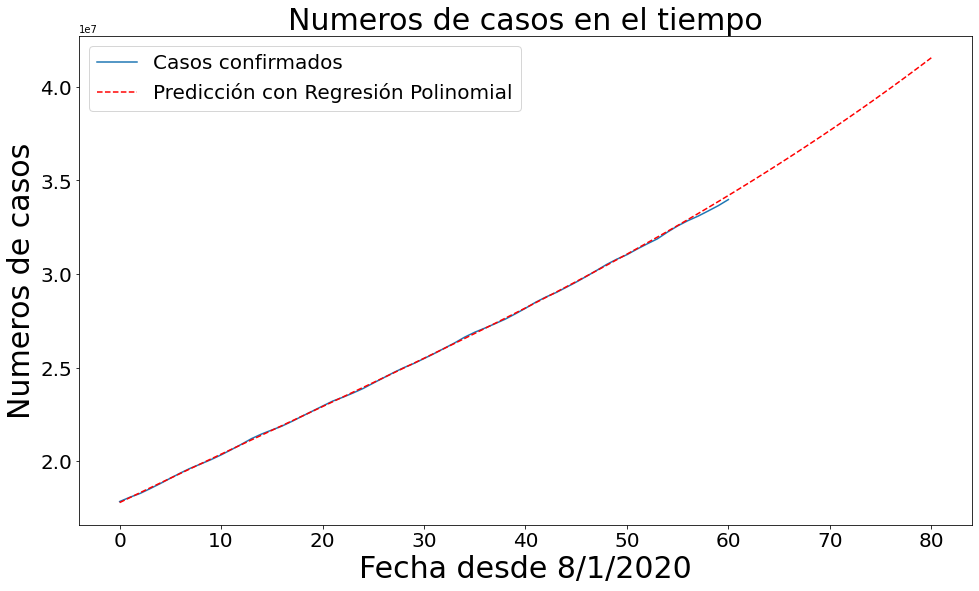

In [ ]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Predicción con Regresión Polinomial', 'red')

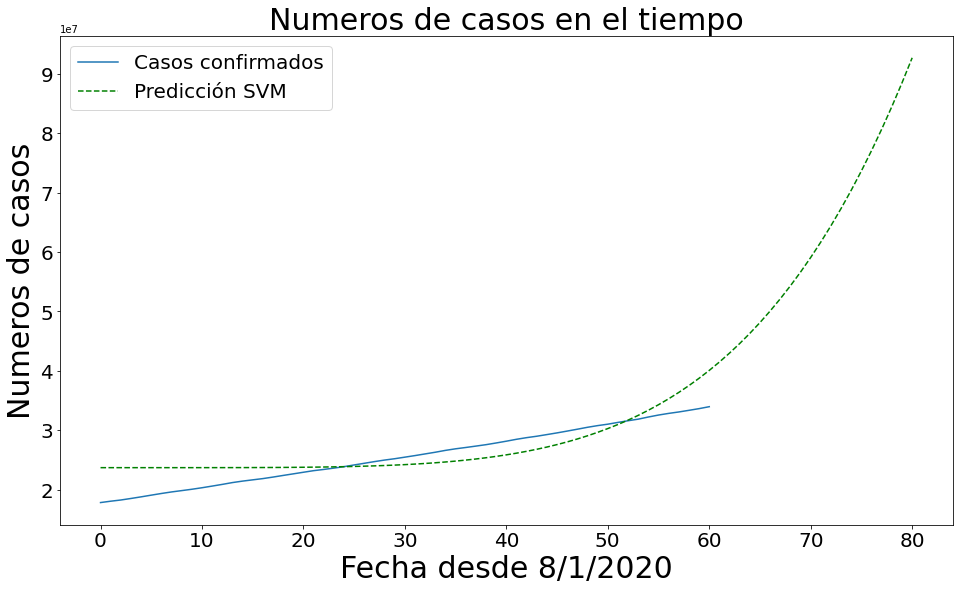

In [ ]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'Predicción SVM', 'green')

In [ ]:
#Se obtienen los datos reales para realizar la comprobación del modelo
confirmados_octubre = confirmed_cases.loc[:,confirmed_cases.columns.str.contains('^(10)/*')]
confirmados_octubre

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20
0,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334,41425
1,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634,20875
2,51690,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651,57942
3,2050,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665,4756
4,5114,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558,10805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,40322,40766,41078,41498,41957,42432,42840,43256,43664,43945,44299,44684,45200,45658,46100,46434,46746,47135,47616,48129,48628,49134,49579,49989,50442,50952,51528,51948,52571,53075,53520
264,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
265,2039,2040,2041,2041,2041,2047,2049,2050,2051,2051,2052,2052,2053,2053,2053,2055,2055,2056,2056,2057,2057,2057,2060,2060,2060,2060,2060,2061,2062,2062,2063
266,14802,14830,14974,15052,15089,15170,15224,15301,15339,15415,15458,15549,15587,15616,15659,15659,15789,15853,15897,15982,16000,16035,16095,16117,16117,16200,16243,16285,16325,16415,16432


In [ ]:
# Range of date
dates = confirmados_octubre.keys()
casos_octubre = []

# Fill with the dataset
for i in dates:
    confirmed_sum = confirmados_octubre[i].sum()
    casos_octubre.append(confirmed_sum)

casos_octubre

[34291473,
 34586973,
 34906995,
 35154835,
 35484864,
 35808220,
 36157473,
 36516981,
 36877877,
 37208764,
 37477246,
 37803476,
 38131909,
 38512567,
 38919273,
 39330619,
 39672335,
 39957157,
 40397055,
 40784993,
 41228785,
 41697473,
 42204202,
 42615119,
 42960467,
 43498333,
 43965280,
 44481666,
 45023421,
 45594180,
 46070799]

In [ ]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Fecha': future_forecast_dates[-20:], 
                        'Predicción con Regresión Polinomial': np.round(linear_pred[-20:]),
                        'Casos Reales': casos_octubre[:20],
                        'Error Absoluto': np.absolute(np.array(casos_octubre[:20]) - np.array(np.round(linear_pred[-20:])))})
poly_df

,Fecha,Predicción con Regresión Polinomial,Casos Reales,Error Absoluto
0,10/01/2020,34524985.0,34291473,233512.0
1,10/02/2020,34859089.0,34586973,272116.0
2,10/03/2020,35196704.0,34906995,289709.0
3,10/04/2020,35537906.0,35154835,383071.0
4,10/05/2020,35882770.0,35484864,397906.0
5,10/06/2020,36231373.0,35808220,423153.0
6,10/07/2020,36583789.0,36157473,426316.0
7,10/08/2020,36940093.0,36516981,423112.0
8,10/09/2020,37300361.0,36877877,422484.0
9,10/10/2020,37664669.0,37208764,455905.0


In [ ]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Fecha': future_forecast_dates[-20:], 
                       'Predicción con SVM': np.round(svm_pred[-20:]),
                       'Casos confirmados Reales': casos_octubre[:20],
                       'Error Absoluto': np.absolute(np.array(casos_octubre[:20]) - np.array(np.round(svm_pred[-20:])))})
svm_df

,Fecha,Predicción con SVM,Casos confirmados Reales,Error Absoluto
0,10/01/2020,41487998.0,34291473,7196525.0
1,10/02/2020,42993176.0,34586973,8406203.0
2,10/03/2020,44598658.0,34906995,9691663.0
3,10/04/2020,46309376.0,35154835,11154541.0
4,10/05/2020,48130422.0,35484864,12645558.0
5,10/06/2020,50067047.0,35808220,14258827.0
6,10/07/2020,52124668.0,36157473,15967195.0
7,10/08/2020,54308869.0,36516981,17791888.0
8,10/09/2020,56625401.0,36877877,19747524.0
9,10/10/2020,59080189.0,37208764,21871425.0
